# Cross Validation

Author: Sahngyoon Rhee

In a previous notebook, we have explained data splitting, where - for a typical data science project- we split up a given data into three parts: training set, validation set, and test set. Here, we explore what cross validation is, and when it can be useful. After that, we implement a simple cross validation.

# The Concept

Cross Validation is using varied parts of the training set as a test set. To put it more precisely, suppose we want to train a specific model $f$. We fix a positive integer $K$ and partition a given data into $K$ equal number of parts, using $K-1$ of the partitions in training the model $f$ and test the trained model on the partition that the model hasn't seen yet (i.e. the partition we held out). We repeat the procedure $K$ times, withholding different partitions each time. We will then get $K$ different accuracies / errors as a result, and the model's true accuracy can be approximated by averaging the $K$ derived accuracies/errors.

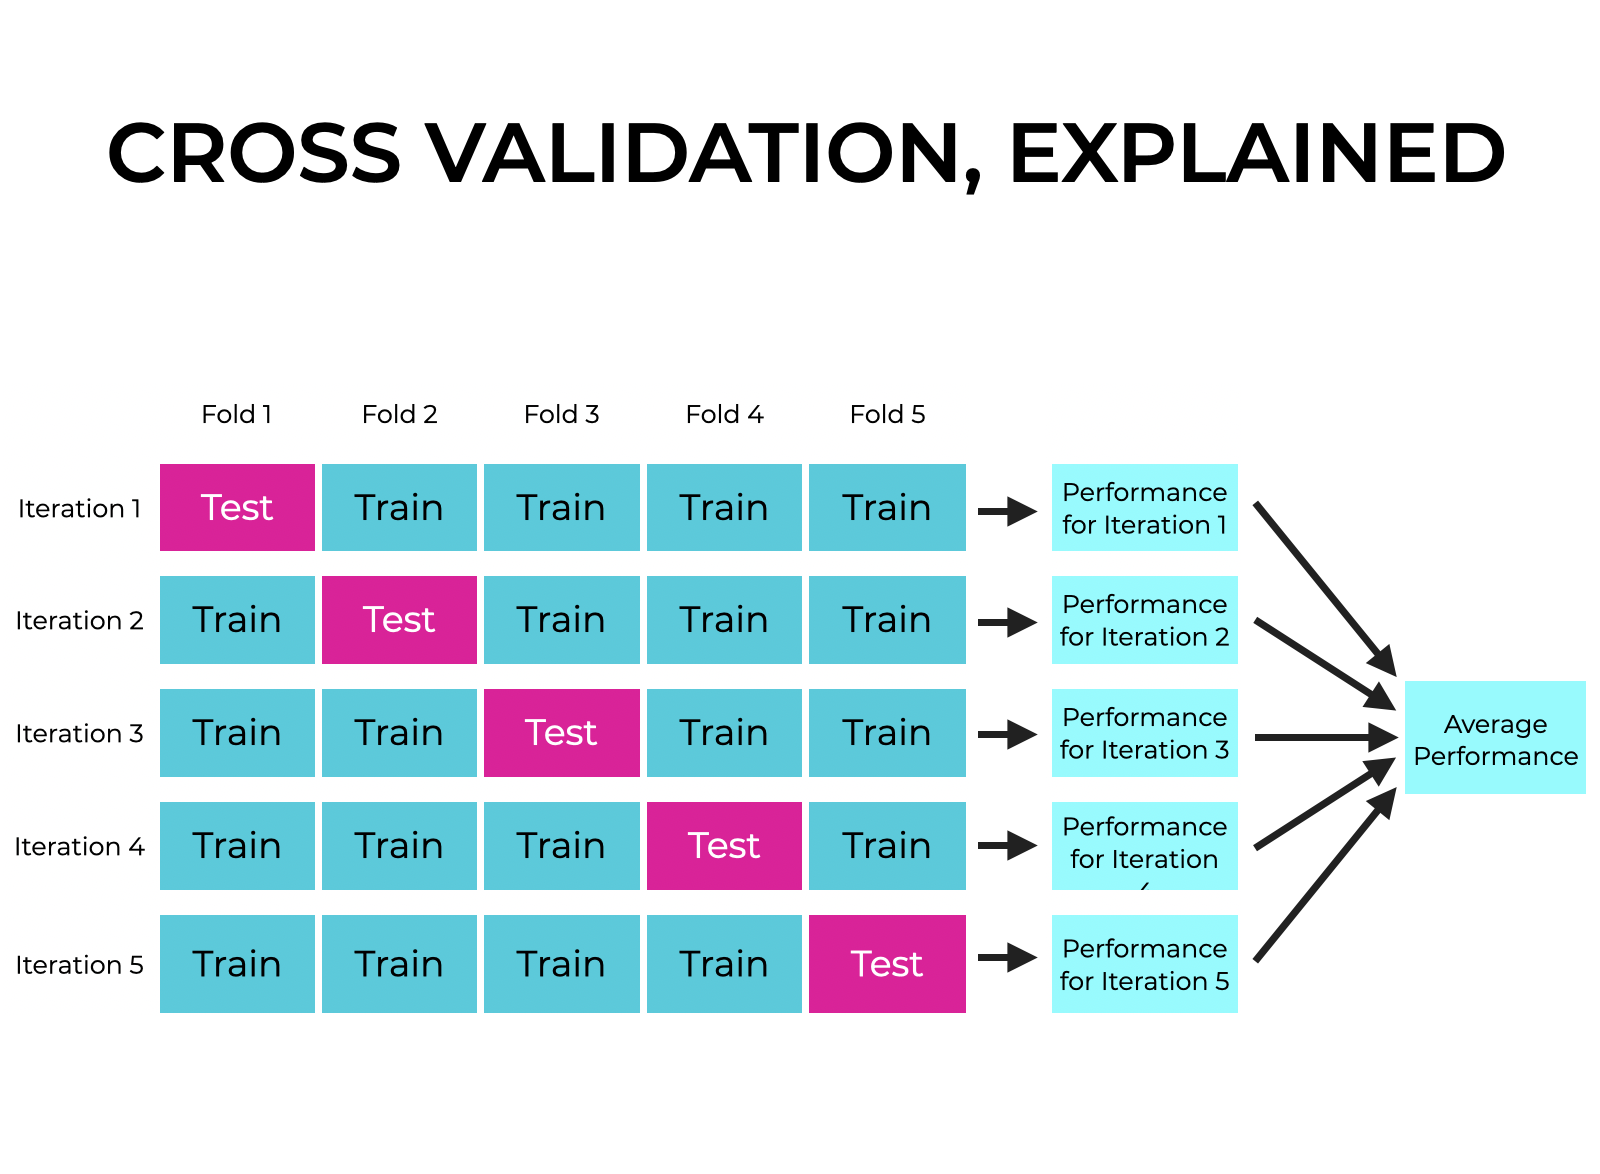

In [1]:
# code to show an explanatory image using the original image's width-height ratio
from PIL import Image as PILImage
from IPython.display import Image
img = PILImage.open('cross_validation.png')
original_width, original_height = img.size
desired_width = 700
new_height = int((desired_width / original_width)*original_height)
Image(filename='cross_validation.png', width=desired_width, height=new_height)

When is cross validation useful? It can be useful when we have a limited number of data. The following example is from Andrew Ng's lecture: suppose we have a rare disease and there are only 100 sample medical data, as that's the total number of people who have that diseases. If we were to make a machine learning model that predicts whether, given a patient's medical record, whether and how long the person is expected to recover from the disease, we could try the traditional 80-20 train-test data split, but given that we have such a low number of training dataset, the cost of using one less data for training is costly. But since we also need a good chunk of data to get a reliable measure of the performance of the data, we also don't want to reduce the number of testing data.

Cross Validation (CV) in this case becomes useful, since using CV would then allow us to use, effectively, all of our given data for training, while getting an accurate enough measure on how well our model would do on an unseen data.

Next, we implement a simple Python code for cross validation. The `iris` dataset is suitable for demonstration because it does not have that many rows of data.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# initialize the classifier
clf = RandomForestClassifier(n_estimators = 100)

# Perform a 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv = 5)

# Print the corss-validation scores
print("Cross-validation scores:", [f'{score:.3f}' for score in scores])
print("Mean cross-validation score:", f'{scores.mean():.3f}')

Cross-validation scores: ['0.967', '0.967', '0.933', '0.933', '1.000']
Mean cross-validation score: 0.960
